# Importando as bibliotecas

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importando a base de dados

In [4]:
dados = pd.read_csv('aluguel_residencial.csv', sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor M²,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,34.67,Apartamento
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento


## Como há uma quantidade grande de bairros, será feito uma seleção de bairros especificos

In [5]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados.Bairro.isin(bairros)
dados = dados[selecao]

## Agrupando o dataset por bairros especificados

In [6]:
grupo_bairro = dados.groupby('Bairro')
dados = dados.query('Valor > 1000')
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor M²,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,34.67,Apartamento
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
13,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
14,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
32928,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento
32930,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0,37.50,Apartamento
32932,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0,100.00,Apartamento
32935,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0,33.33,Casa


## Valor médio do aluguel para cada bairro

In [7]:
for bairro, data in grupo_bairro:
    print(f'{bairro} -> R${data.Valor.mean():.2f}')

Barra da Tijuca -> R$9019.59
Botafogo -> R$19517.04
Copacabana -> R$4509.83
Flamengo -> R$6923.48
Ipanema -> R$10456.52
Leblon -> R$11052.35
Tijuca -> R$2954.67


In [8]:
grupo_bairro.Valor.aggregate(['mean', 'min', 'max']).rename(columns = {'mean': 'Média', 'min': 'Mínimo', 'max': 'Máximo'}).round(2)

,Média,Mínimo,Máximo
Bairro,,,
Barra da Tijuca,9019.59,100.0,738197.0
Botafogo,19517.04,299.0,4500000.0
Copacabana,4509.83,100.0,198000.0
Flamengo,6923.48,200.0,212544.0
Ipanema,10456.52,100.0,800000.0
Leblon,11052.35,100.0,430000.0
Tijuca,2954.67,320.0,230000.0


## Análise descritiva

Podemos observar que, Ipanema, Leblon e Botafogo, são os bairros com maior média de aluguel. Os três bairros, 
apresentam os maiores valores de aluguel, chegando a R$ 4500000.00, em Botafogo. Esse é um valor irreal para aluguel, o que pode indicar um outlier. Possivelmente, esse valor se refere ao preço de venda do imóvel. Relativo ao valor médio, esse é um resultado esperado, visto que os bairros citados, são de alto padrão.

## Representação gráfica das médias por bairro

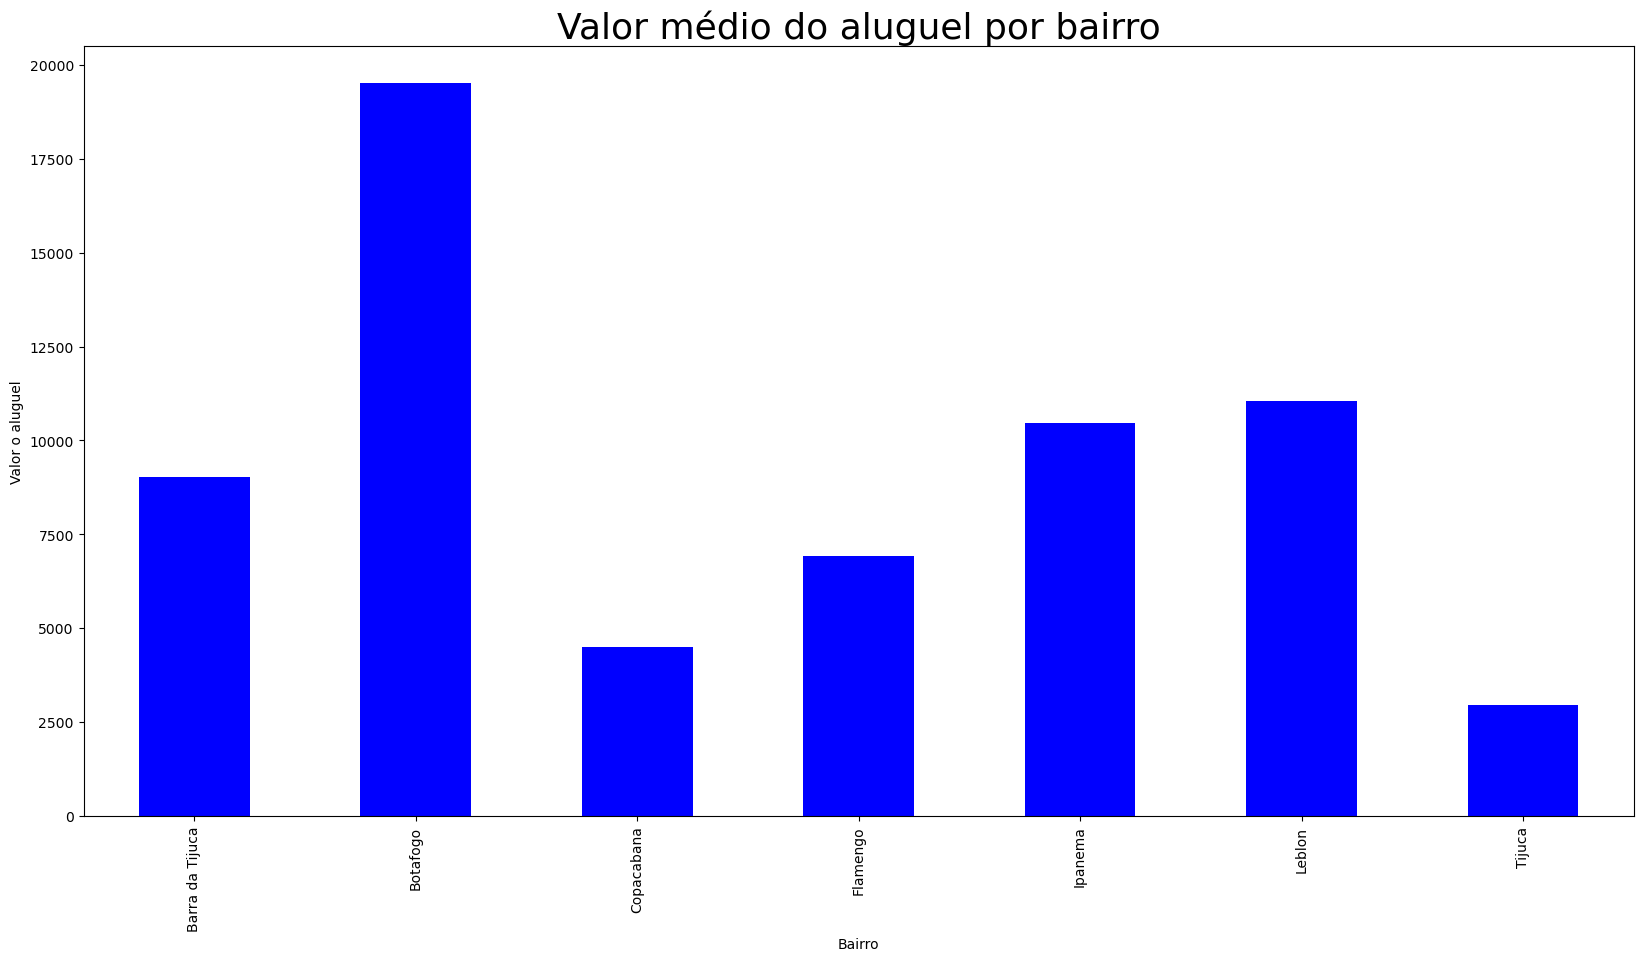

In [21]:
fig = grupo_bairro.Valor.mean().plot.bar(color='blue')
fig.set_ylabel('Valor o aluguel')
fig.set_title('Valor médio do aluguel por bairro', fontsize=26)
plt.rc('figure', figsize=(20, 10))

## Análise gráfica

Podemos concluir com a análise gráfica que, os bairros de Ipanema, Leblon e Botafogo são os bairros com os aluguéis mais caros do Rio de Janeiro. Isso é o esperado, pois os três bairros são situados na zona sul, região mais rica da cidade, confirmando a análise descritiva.

# Identificando e removendo Outliers

Podemos observar a presença de registros acima do limite superior, o que representa os Outliers. O ponto mais acima no gráfico, corresponde seguramente ao imóvel em Botafogo, citado anteriormente.  

In [10]:
valor = dados['Valor']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [11]:
selecao = (valor >=limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:title={'center':'Valor'}, xlabel='[Bairro]'>

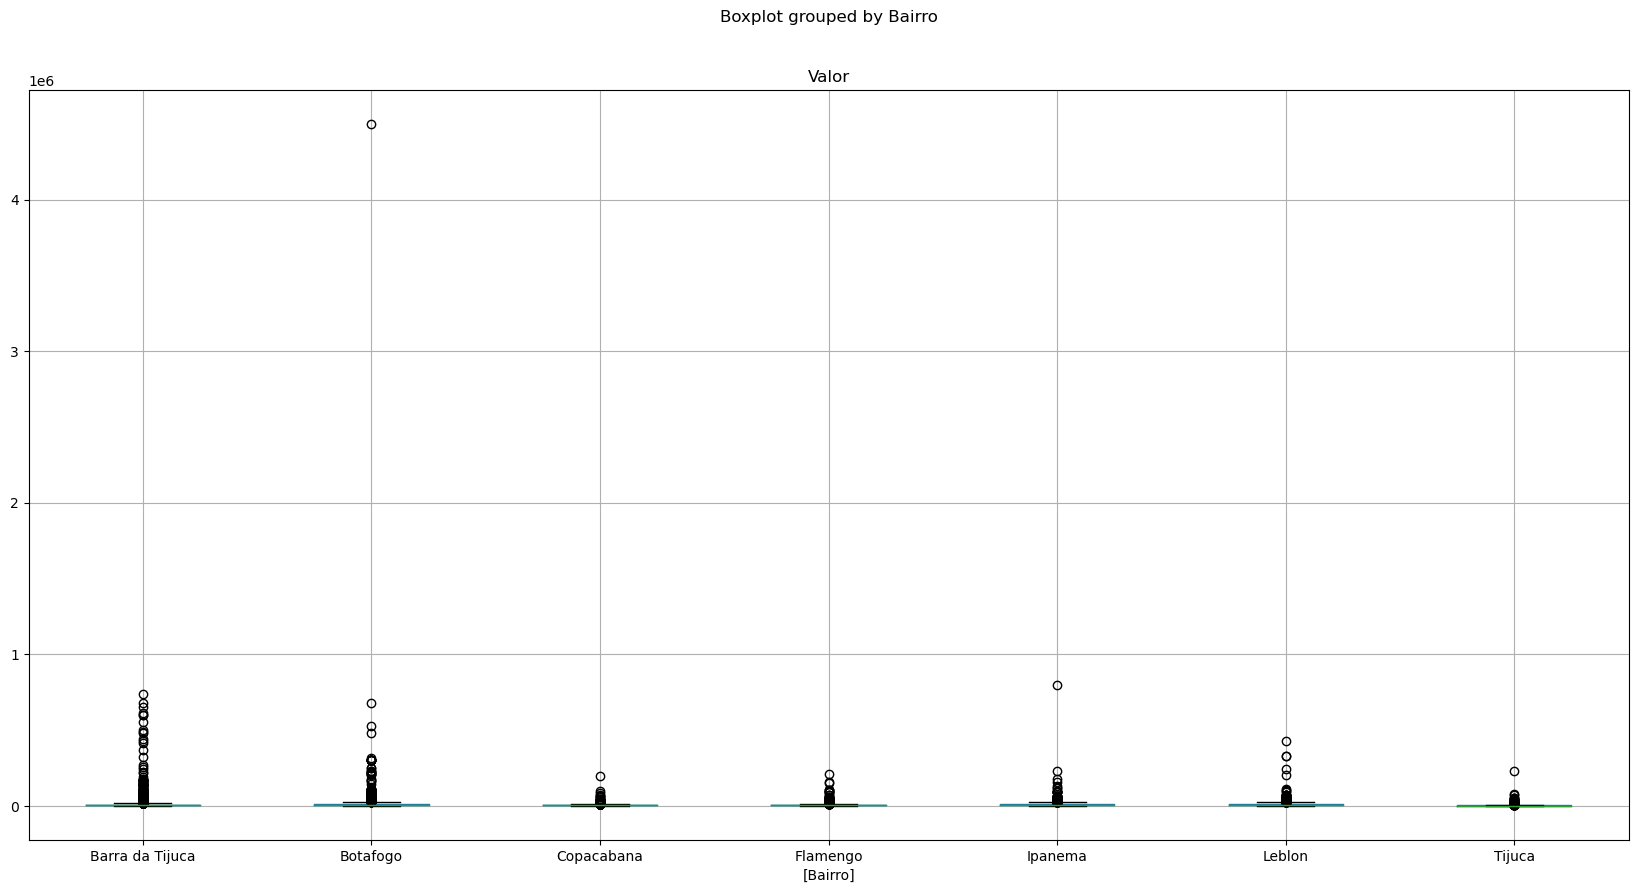

In [12]:
dados.boxplot(['Valor'], by=['Bairro'])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Bairro]'>

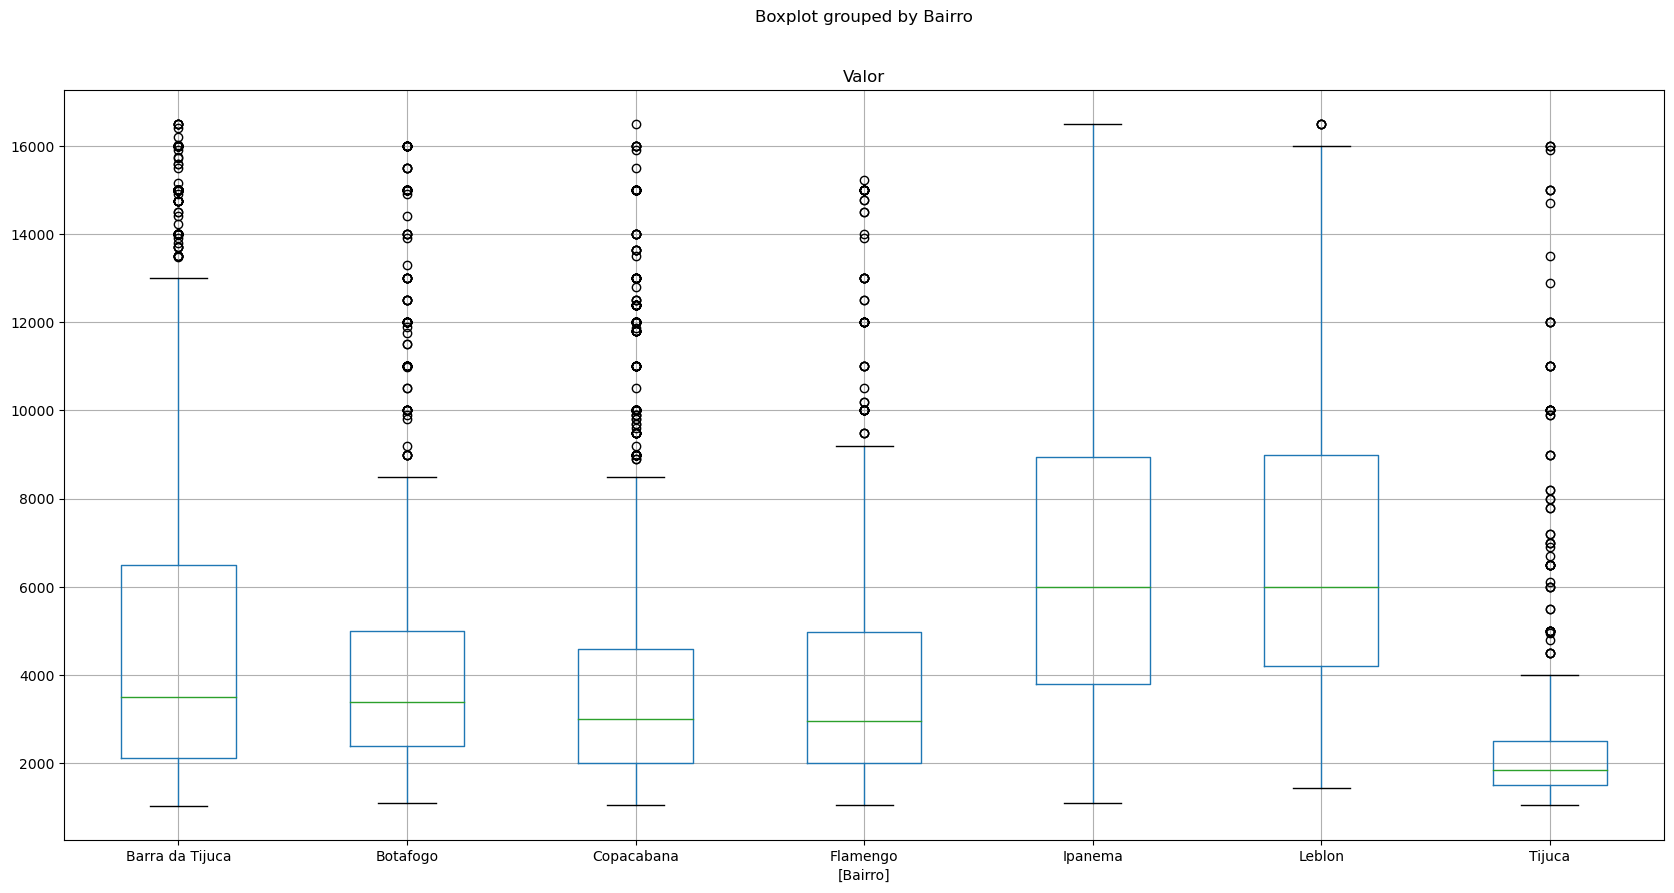

In [13]:
dados_new.boxplot(['Valor'], by=['Bairro'])

O primeiro gráfico, engloba todos os registros do dataset, inclusive os Outliers. O segundo, engloba os dados sem Outliers. Fica claro, a interferência desses registros, na visualização e na informação transmitida pelos dados.
Mesmo com o tratamento dos dados, é possivel observar que em bairros como, Tijuca, Botafogo, Copacabana e Flamengo, ainda há uma presença considerável de Outliers. Uma possivel explicação, é que nesses bairros, há imóveis de alto padrão e baixo padrão, enquanto no Leblon, por exemplo, há uma predominância de imóveis de alto padrão com aluguel em média de R$ 6000.00.

Text(0.5, 1.0, 'Imóvel de alto padrão')

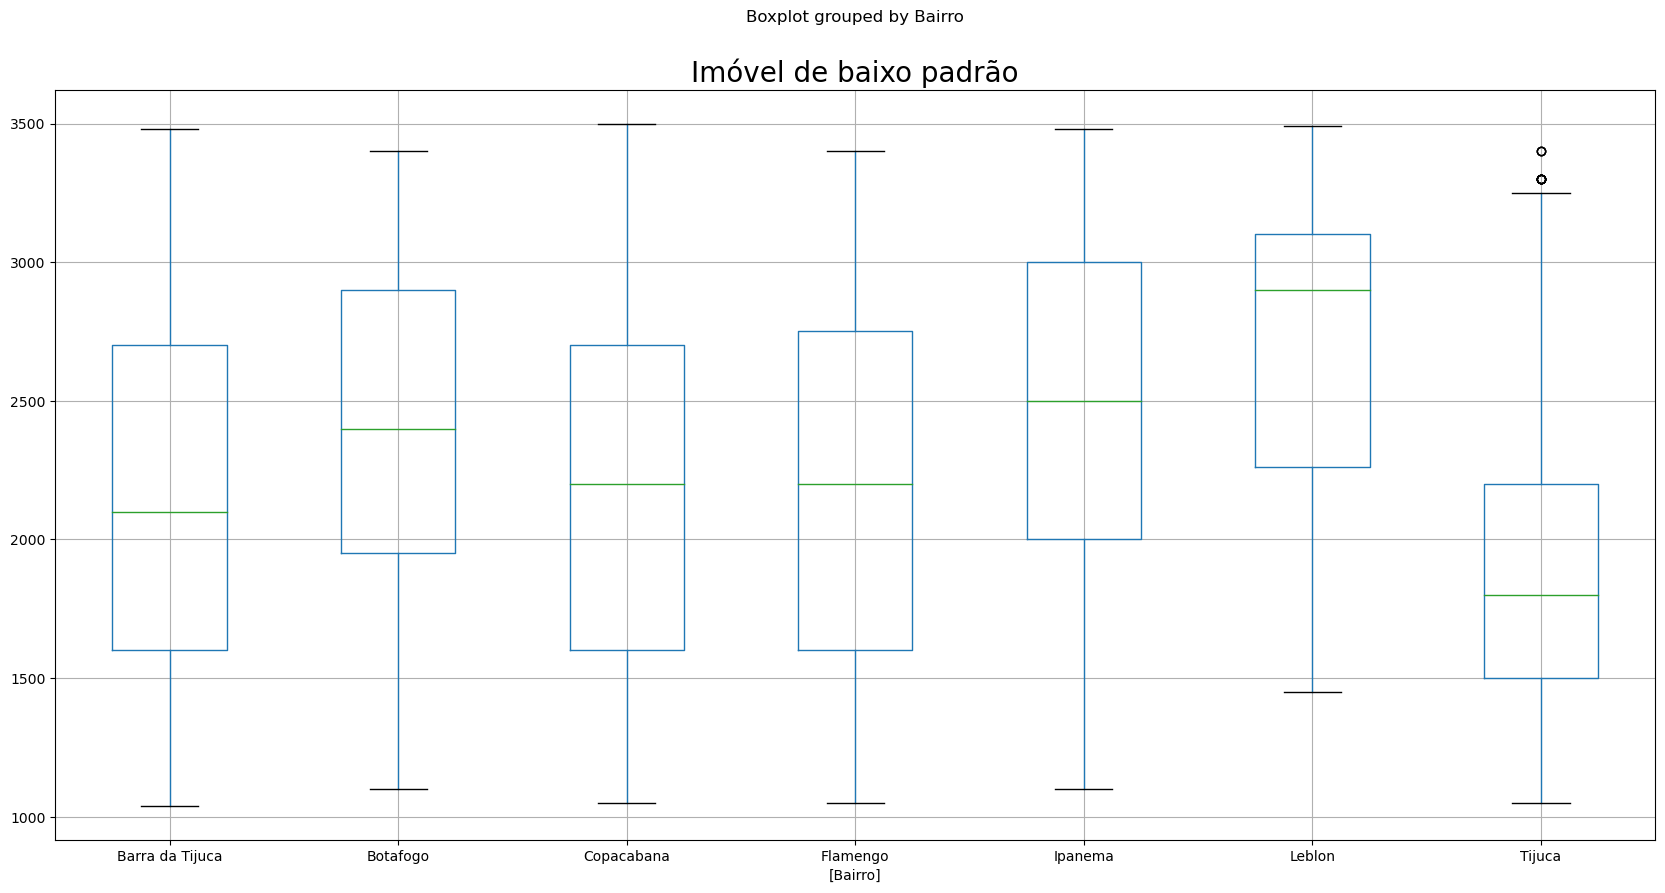

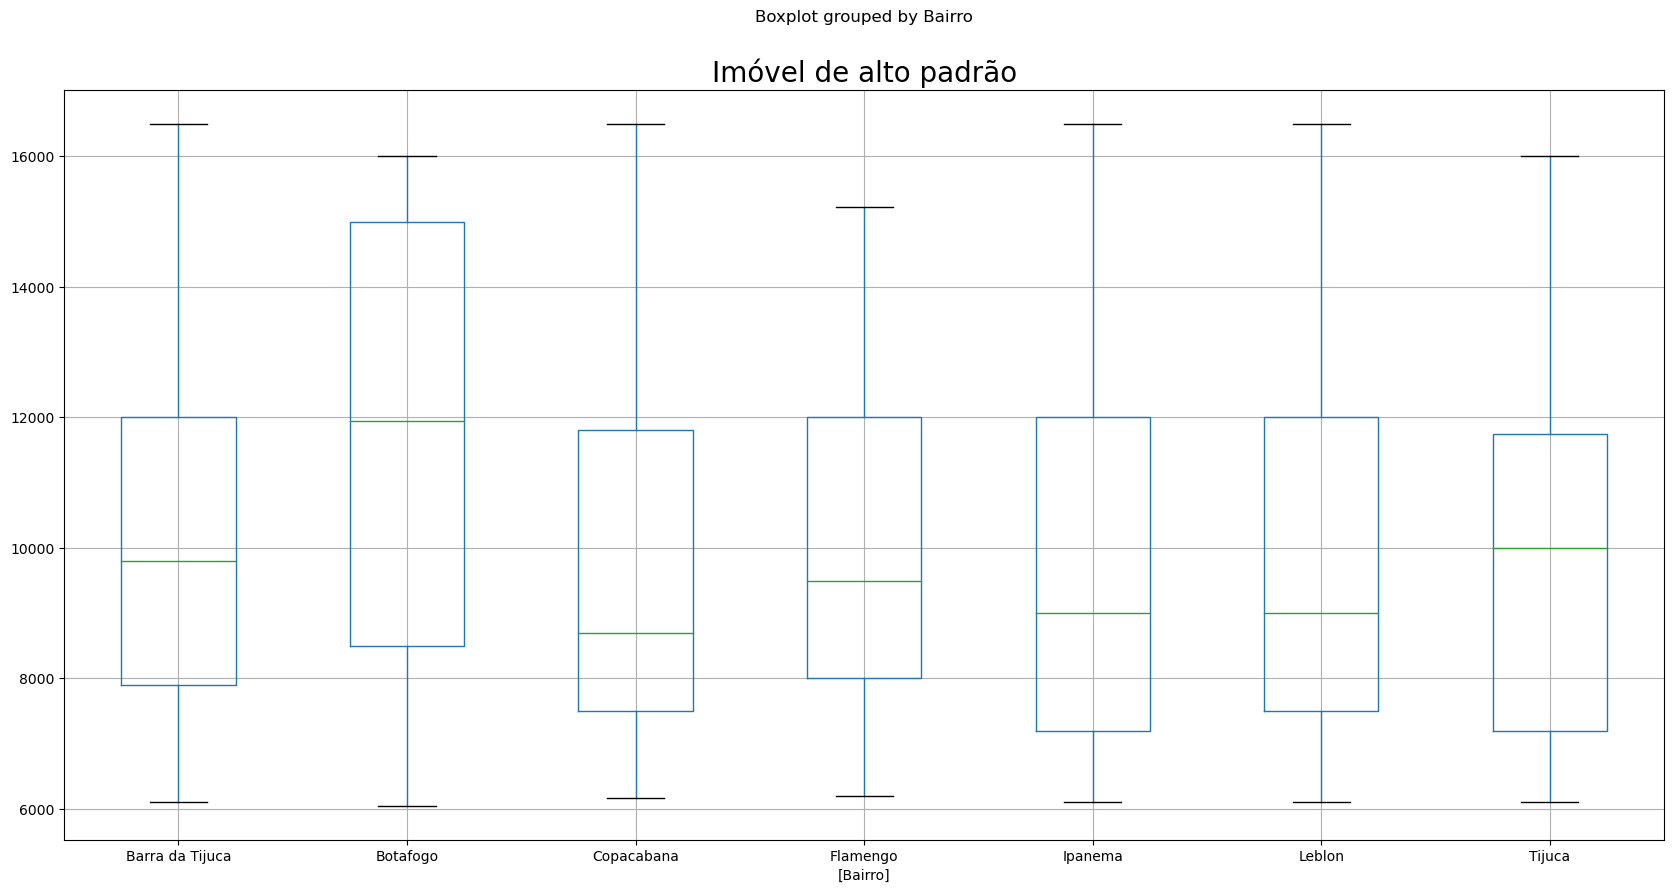

In [14]:
baixo_padrao = dados_new.query('Valor < 3500')
alto_padrao = dados_new.query('Valor > 6000')
baixo_padrao.boxplot(['Valor'], by=['Bairro']).set_title('Imóvel de baixo padrão', fontsize=20)
alto_padrao.boxplot(['Valor'], by=['Bairro']).set_title('Imóvel de alto padrão', fontsize=20)

Para imóveis de alto padrão, Botafogo, Flamengo e Leblon, possuem a maior média de aluguel. Pode-se adicionar, que o bairro de Botafogo, possui os imóveis mais caros. Por outro lado, a média de aluguel mais baixa, é do bairro da Tijuca, sendo o bairro mais barato, dentre os analisados.

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

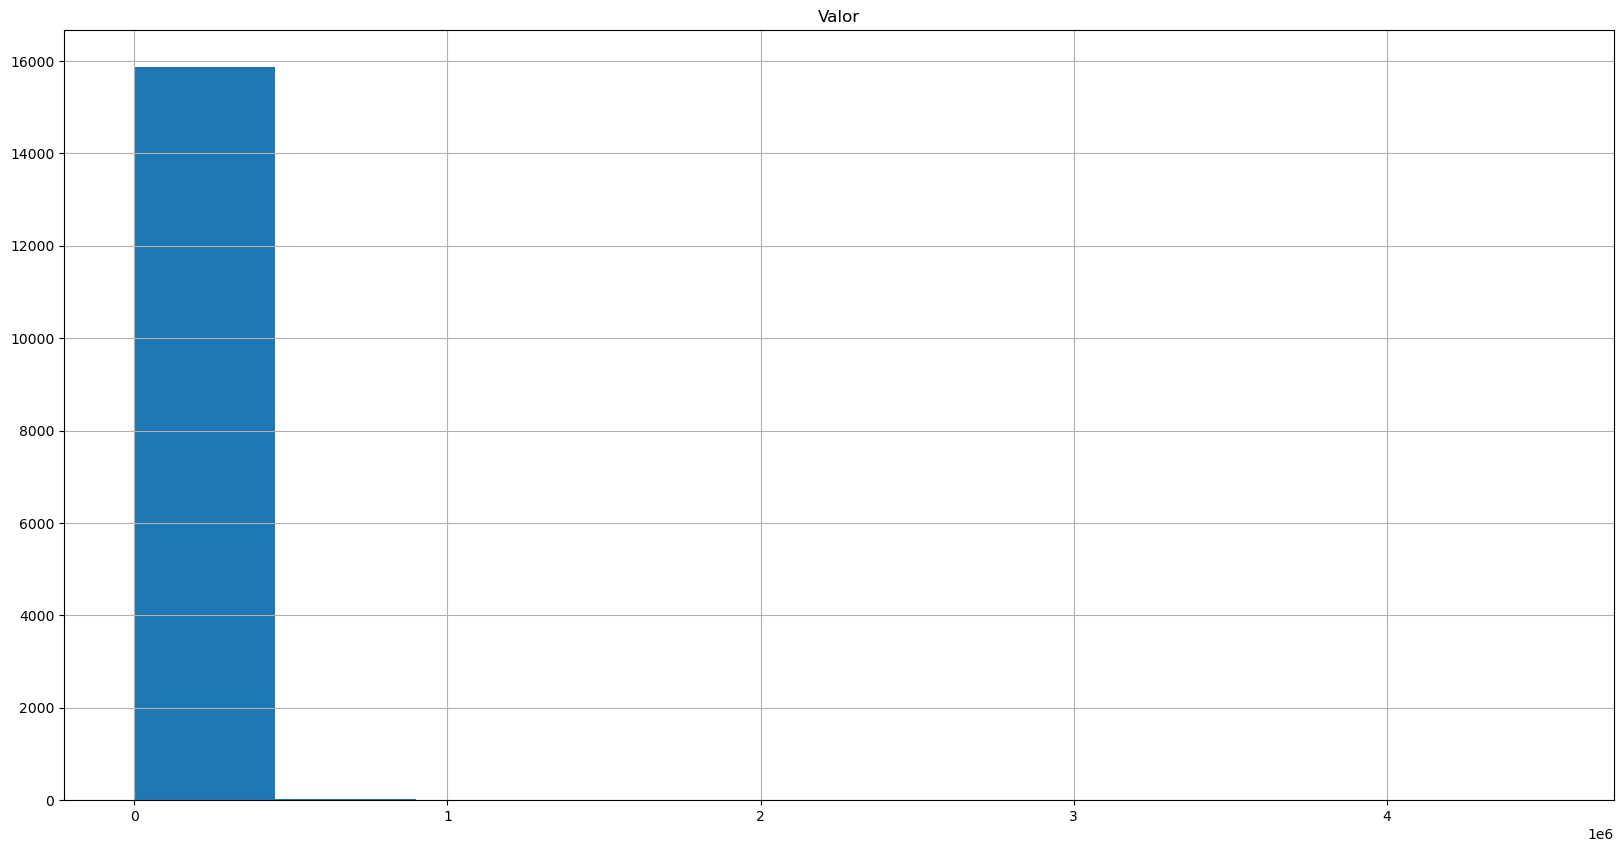

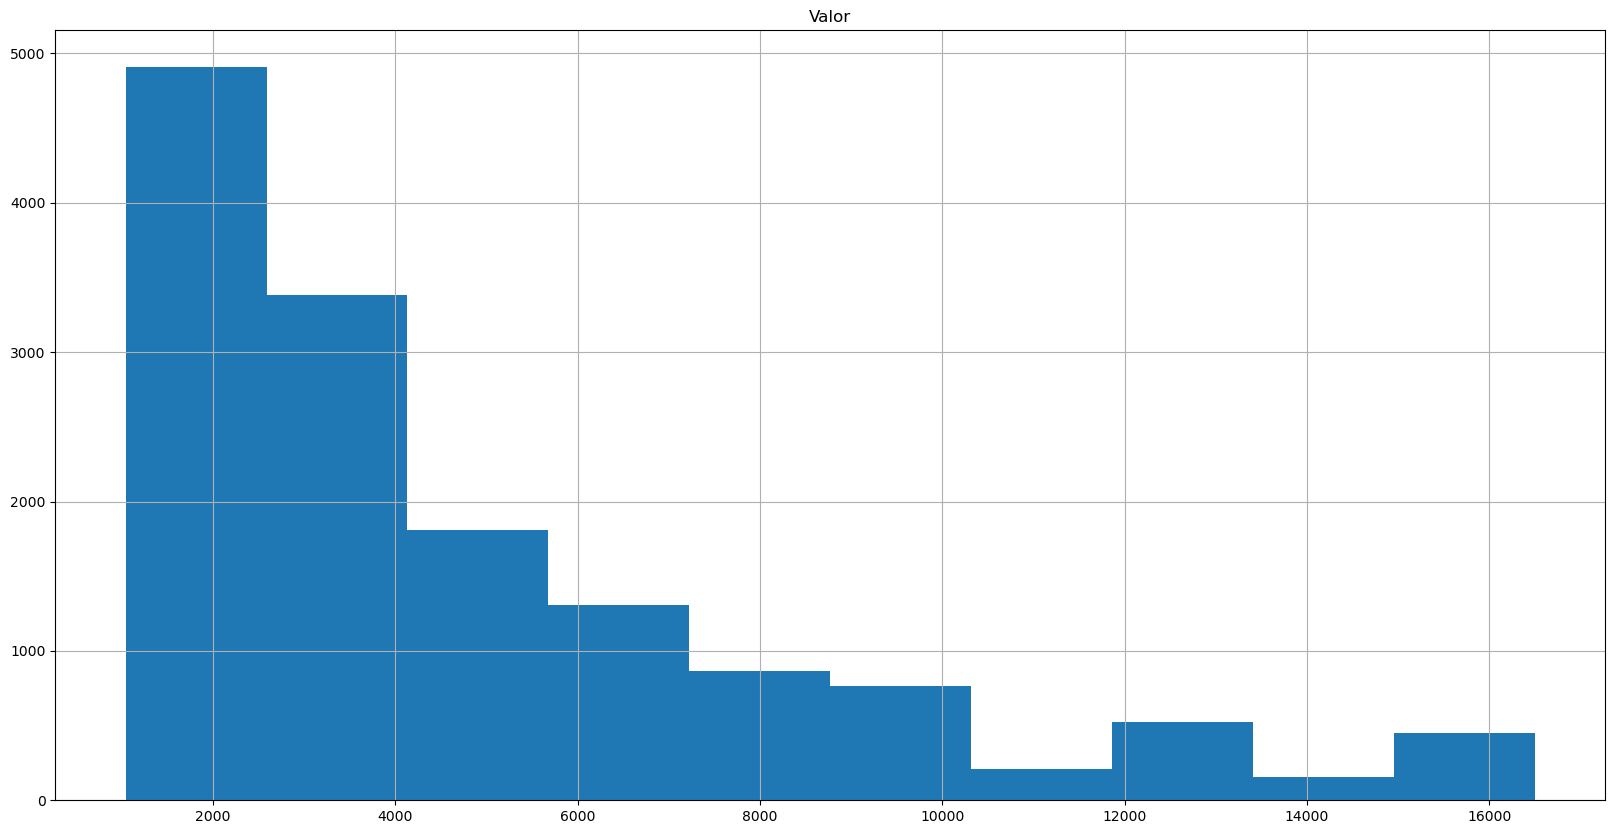

In [15]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

Com esses dois gráficos, podemos observar como os Outliers interferem na representação dos dados. Podemos afirmar que a curva formada, é assimétrica a direita, ou seja, a média é maior que a mediana, que é maior do que a moda.

# Boxplot para tipos de Imóveis

In [16]:
dados.Tipo.unique()

array(['Quitinete', 'Conjunto Comercial/Sala', 'Casa de Condomínio',
       'Apartamento', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Casa Comercial', 'Terreno Padrão', 'Casa', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Galpão/Depósito/Armazém',
       'Casa de Vila', 'Pousada/Chalé', 'Hotel', 'Studio',
       'Loteamento/Condomínio'], dtype=object)

In [17]:
quitinete = dados.Tipo == 'Quitinete'
casa_de_condominio = dados.Tipo == 'Casa de Condomínio'
apartamento = dados.Tipo == 'Apartamento'
casa = dados.Tipo == 'Casa'
casa_de_vila = dados.Tipo == 'Casa de Vila'

In [19]:
print(f'Quantidade de quitinetes: {dados[quitinete].shape[0]}')
print(f'Quantidade de casas de condomínio: {dados[casa_de_condominio].shape[0]}')
print(f'Quantidade de apartamentos: {dados[apartamento].shape[0]}')
print(f'Quantidade de casas: {dados[casa].shape[0]}')
print(f'Quantidade de casas de vila: {dados[casa_de_vila].shape[0]}')

Quantidade de quitinetes: 400
Quantidade de casas de condomínio: 515
Quantidade de apartamentos: 11236
Quantidade de casas: 123
Quantidade de casas de vila: 29


Text(0.5, 1.0, 'Imóvel de alto padrão')

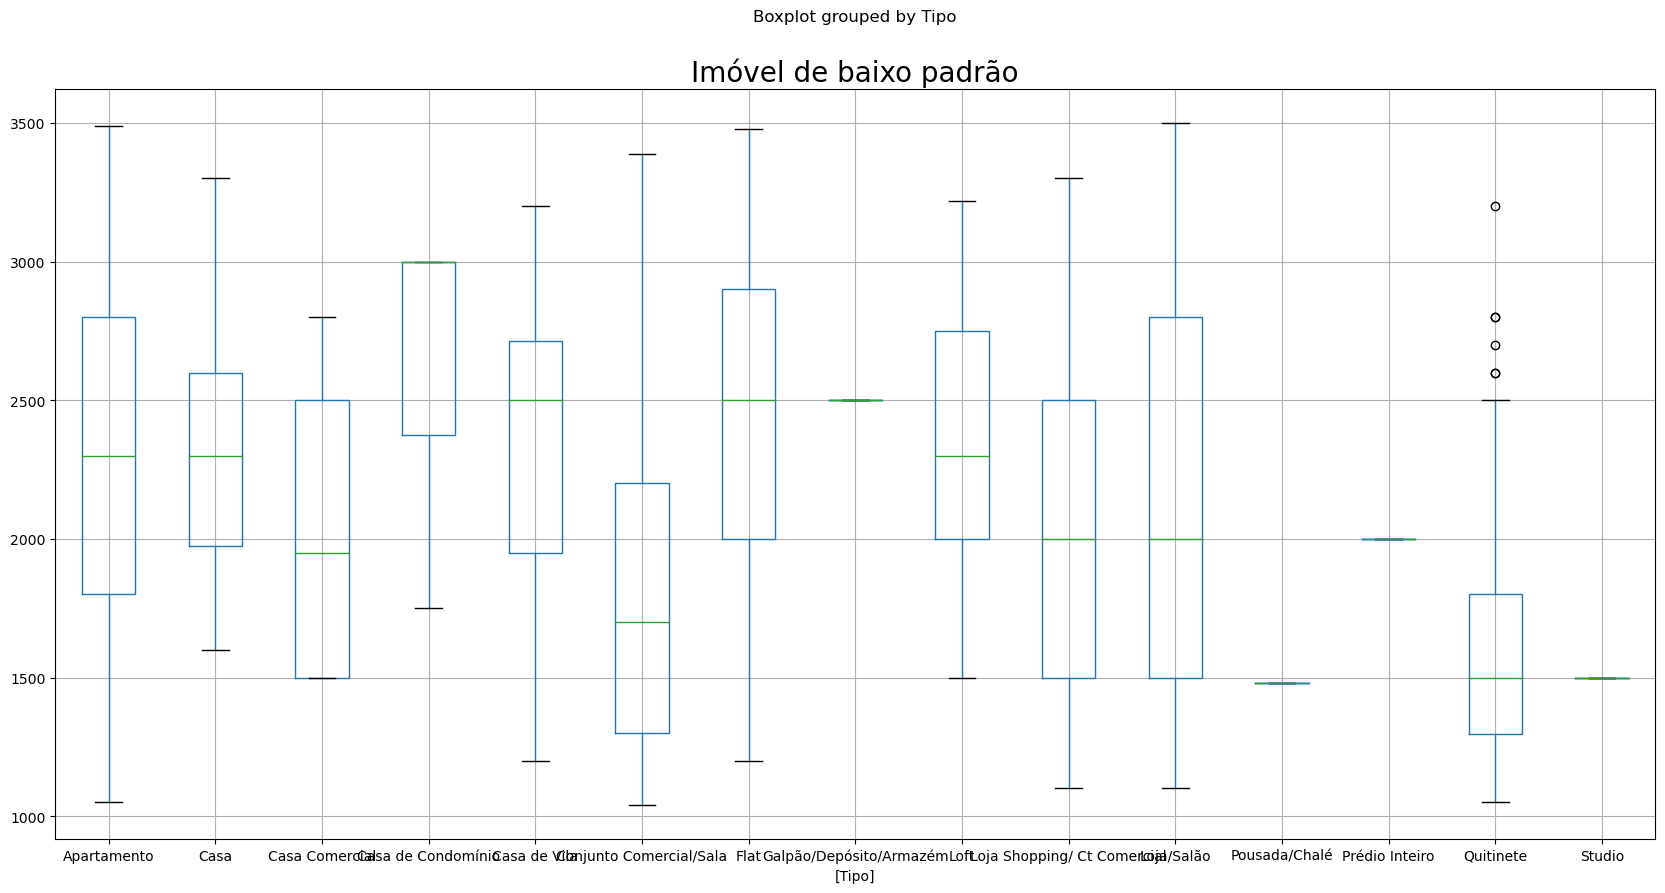

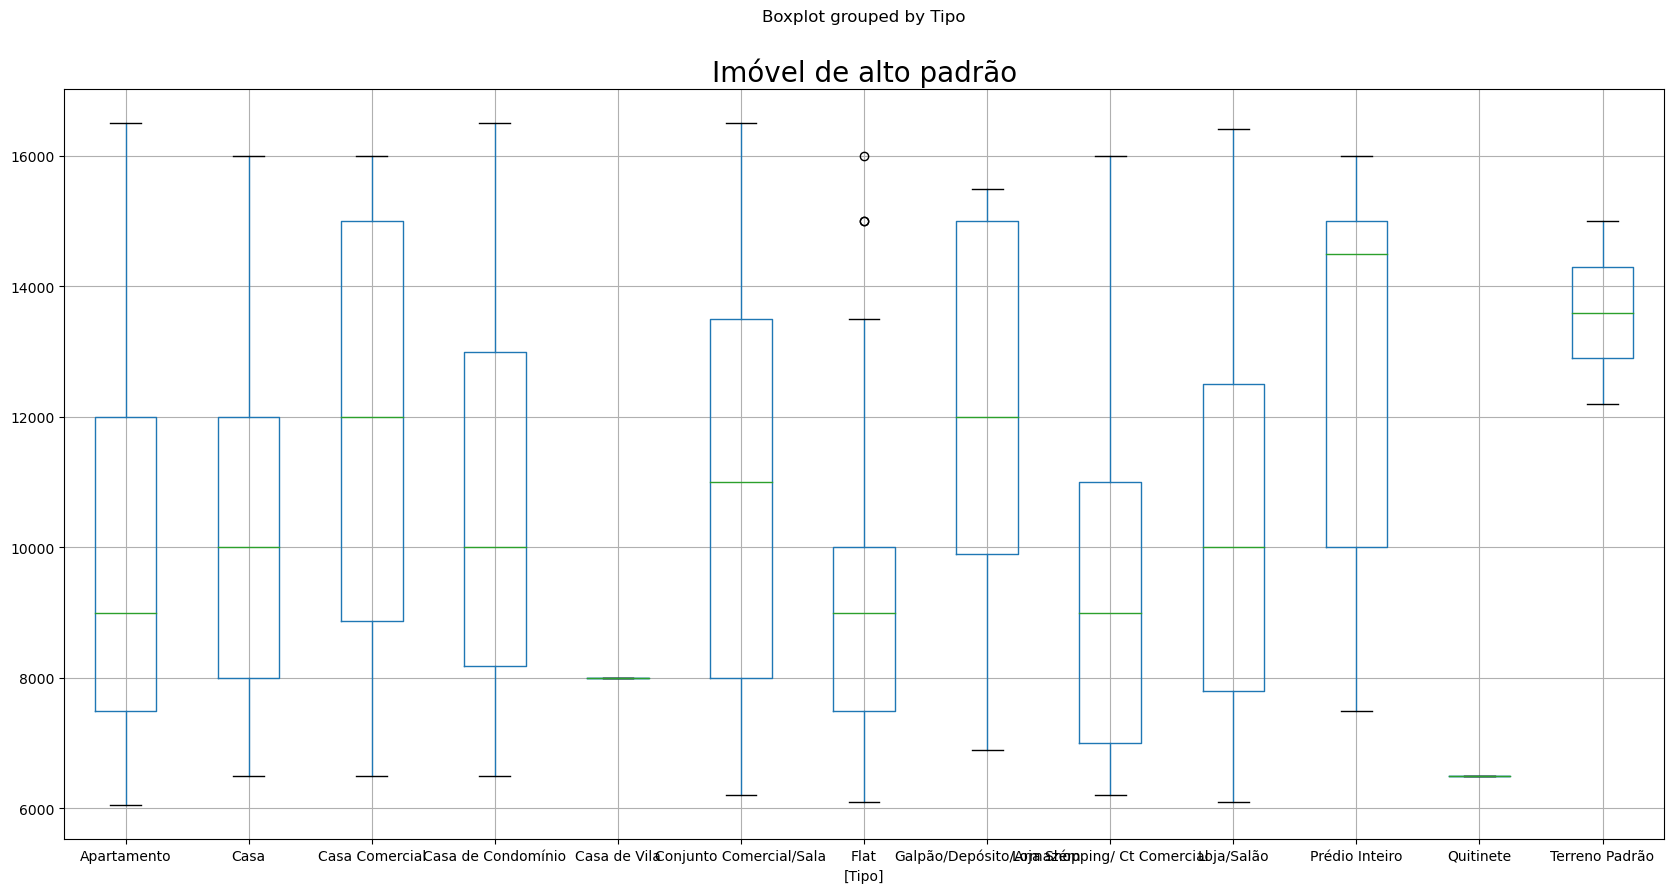

In [20]:
baixo_padrao.boxplot(['Valor'], by=['Tipo']).set_title('Imóvel de baixo padrão', fontsize=20)
alto_padrao.boxplot(['Valor'], by=['Tipo']).set_title('Imóvel de alto padrão', fontsize=20)

Como esperado, a maior média de aluguel para imóveis de alto padrão, são para casas e casas de condomínio. Enquanto as quitinetes, apresentam a menor média de aluguel, para imóveis de baixo padrão, sendo as opções mais baratas.